# Example for reading clm-file for example Zwolle
The clm.nc file is read and *variable* is extracted. Next, the mesh data is manipulated, converted to a raster and saved to a .tiff.

Manipulation of the mesh data includes obtaining the arrival time, the maximum rising speed, and the water height h_mrs at which this happen.

Case by Arcadis through hydrolib

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

currentdir = os.path.dirname(os.getcwd())
sys.path.append(currentdir + "/HydroLogic_Inundation_toolbox")
sys.path.append(currentdir + "/HydroLogic_Inundation_toolbox/Readers")

from flowmeshreader import load_classmap_data, mesh_to_tiff
from inundation_toolbox import arrival_times, height_of_mrs, rising_speeds
from plotting import raster_plot_with_context

In [2]:
# set paths
input_file_path = currentdir + r"/HydroLogic_Inundation_toolbox/Data/Zwolle/input/FlowFM_clm.nc"
output_file_path = currentdir + r"/HydroLogic_Inundation_toolbox/Data/Zwolle/output"

In [3]:
# raster options
resolution = 1  # m
distance_tol = 15  # m
interpolation = r"nearest"

In [4]:
variable = r"Mesh2d_waterdepth"
time_step = np.timedelta64(15*60, "s") # fifteen minutes

In [5]:
# load mesh coordinates and data from netCDF 
clm_data, map_data = load_classmap_data(input_file_path, variable, method="lower")

In [6]:
# Prepare inundation specific parameter
t_arrival = arrival_times(clm_data, time_step, time_unit="D", arrival_threshold=3)

s_rising = rising_speeds(map_data, time_step = time_step, time_unit="m")
max_s_rising = np.amax(s_rising, axis=0)

h_mrs = height_of_mrs(map_data, s_rising)

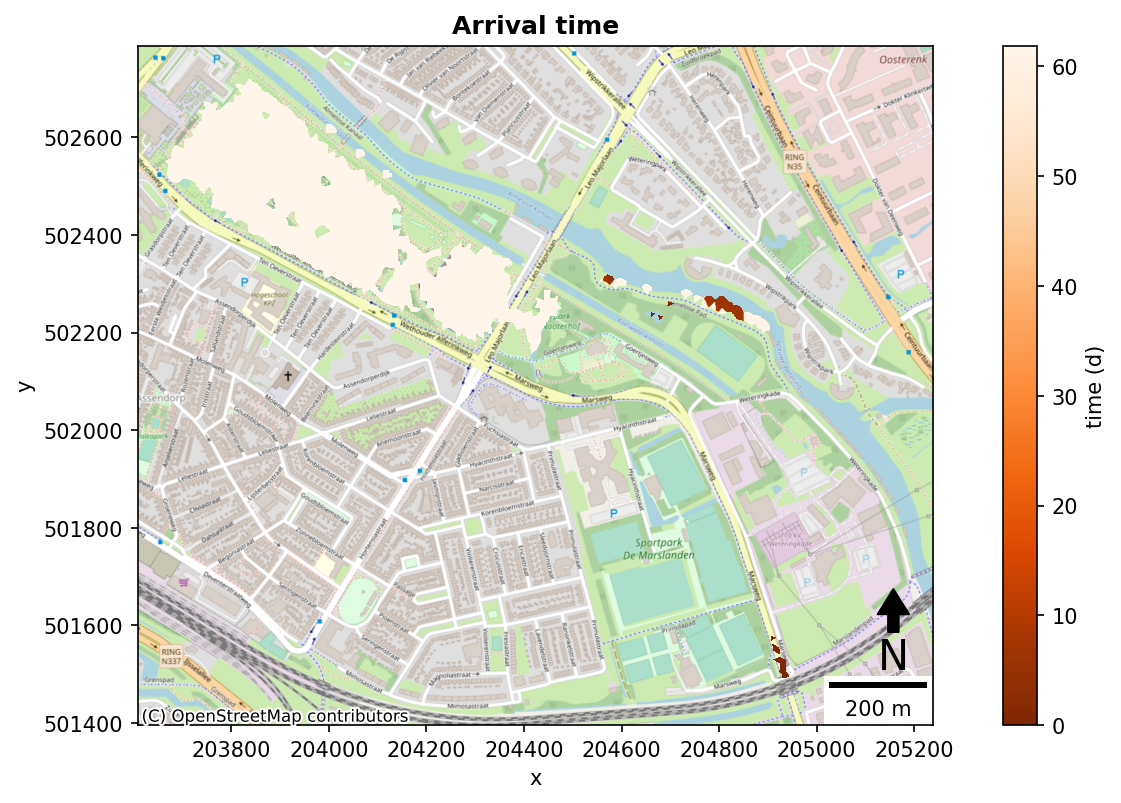

In [7]:
# Plot arrival times
_, _, grid_data = mesh_to_tiff(
        t_arrival,
        input_file_path,
        output_file_path + r"\arrival.tiff",
        resolution,
        distance_tol,
        interpolation=interpolation,
    )
fig, ax = raster_plot_with_context(
    raster_path = output_file_path + r"\arrival.tiff", 
    epsg = 28992, 
    clabel = "time (d)", 
    cmap = "Oranges_r", 
    title = "Arrival time",
    )

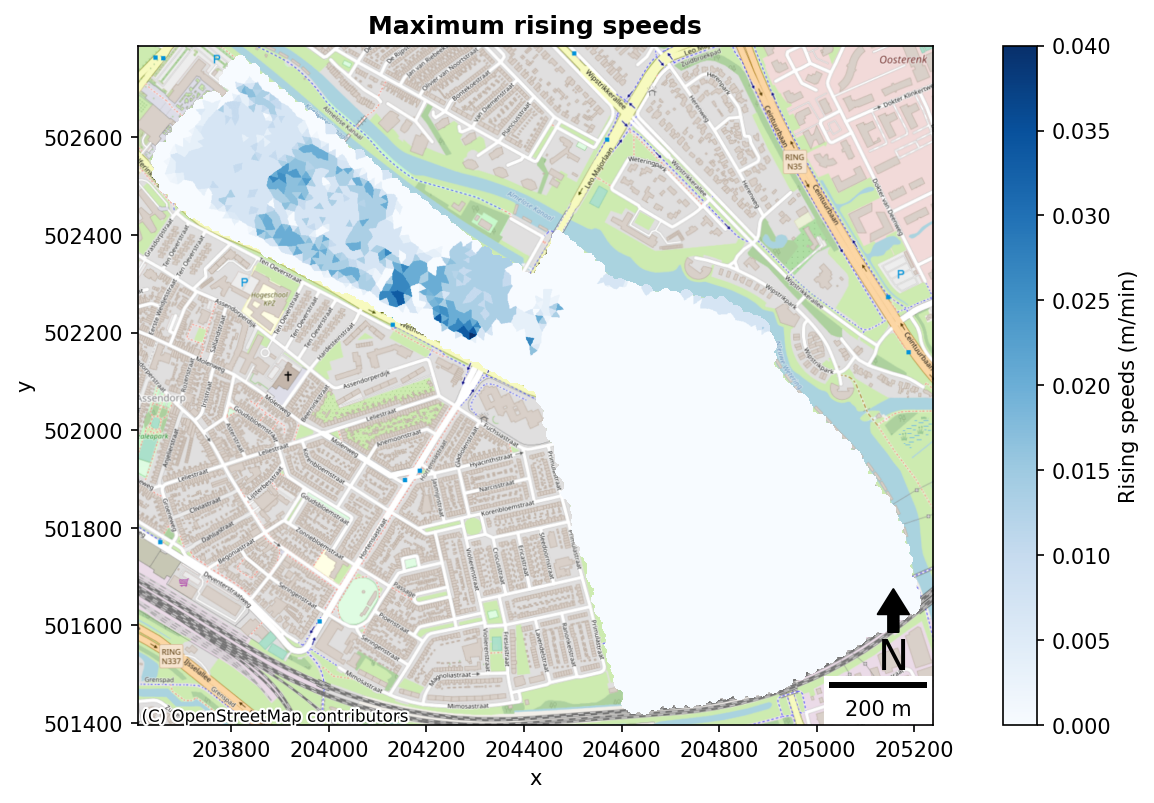

In [8]:
# Plot maximum rising speeds
_, _, grid_data = mesh_to_tiff(
        max_s_rising,
        input_file_path,
        output_file_path + r"\max_rising.tiff",
        resolution,
        distance_tol,
        interpolation=interpolation,
    )
fig, ax = raster_plot_with_context(
    raster_path = output_file_path + r"\max_rising.tiff", 
    epsg = 28992, 
    clabel = "Rising speeds (m/min)", 
    cmap = "Blues", 
    title = "Maximum rising speeds",
    )

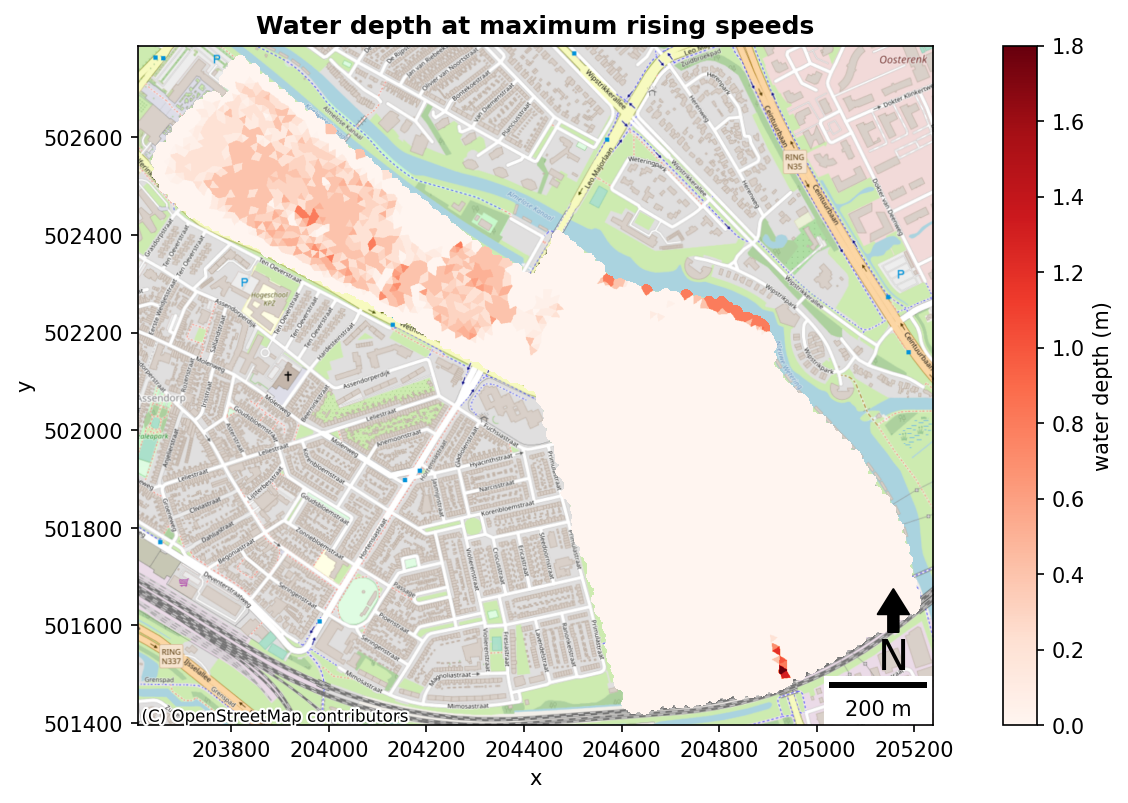

In [9]:
# Plot water depth of maximum rising speed
_, _, grid_data = mesh_to_tiff(
        h_mrs,
        input_file_path,
        output_file_path + r"\h_mrs.tiff",
        resolution,
        distance_tol,
        interpolation=interpolation,
    )
fig, ax = raster_plot_with_context(
    raster_path = output_file_path + r"\h_mrs.tiff", 
    epsg = 28992, 
    clabel = "water depth (m)", 
    cmap = "Reds", 
    title = "Water depth at maximum rising speeds",
    )